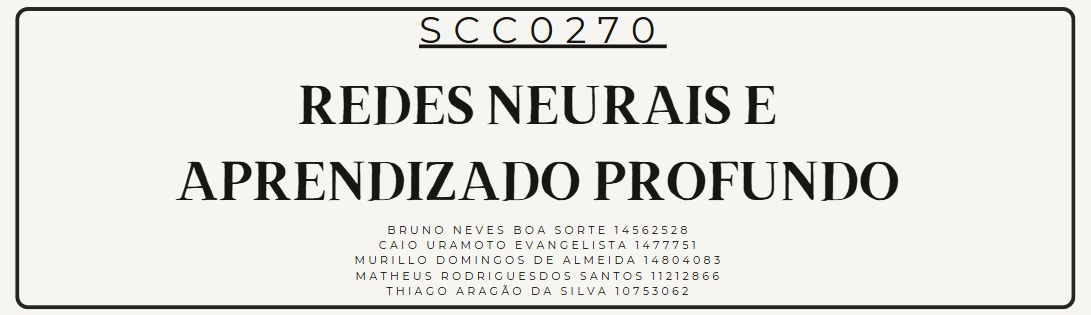

## Introdução

---

### Projeto Multimodal de Redes Neurais para Detecção e Análise de Tumores Cerebrais (CT + MRI)

---

## Descrição Geral

Este projeto tem como objetivo o desenvolvimento de um modelo de **aprendizado profundo multimodal**, utilizando imagens de **Tomografia Computadorizada (CT)** e **Ressonância Magnética (MRI)** para **detecção, classificação e análise de tumores cerebrais**.

O uso de múltiplas modalidades de imagem permite ao modelo combinar informações complementares:

* **CT:** Estruturas ósseas e calcificações.
* **MRI:** Detalhes de tecidos moles.

Essa abordagem busca auxiliar no **diagnóstico precoce**, na **classificação de tipos de tumores** e como suporte a decisões clínicas.

---

## Sobre o Conjunto de Dados

O dataset foi construído a partir de diferentes fontes públicas e privadas.

* **Modalidades:** CT e MRI.
* **Tipos de Tumores:** Glioma, Meningioma, Pituitário, entre outros.
* **Tamanhos das Imagens:** Diversos (256x256, 512x512).
* **Anotações:** Tipo de tumor, localização (em alguns casos), modalidade da imagem.

---

## Fontes do Conjunto de Dados

### Imagens de Tomografia Computadorizada (CT):

* [CT Brain Segmentation - Roboflow](https://universe.roboflow.com/joshua-zgc7b/ct-brain-segmentation)
* [CT to MRI cGAN - Kaggle](https://www.kaggle.com/datasets/darren2020/ct-to-mri-cgan)
* [CT Head Scans - Kaggle](https://www.kaggle.com/datasets/clarksaben/ct-head-scans)
* [Head CT Images for Classification - Kaggle](https://www.kaggle.com/datasets/nipaanjum/head-ct-images-for-classification)
* Dados privados (Cérebro Anônimo)
* [CT e MRI não pareados - Mendeley Data](https://data.mendeley.com/datasets/z4wc364g79/1)

### Imagens de Ressonância Magnética (MRI):

* [Brain Tumor MRI Scans - Kaggle](https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans)
* [Brain Tumor MRIs - Kaggle](https://www.kaggle.com/datasets/vinayjayanti/brain-tumor-mris)
* [Siardataset - Kaggle](https://www.kaggle.com/datasets/masoumehsiar/siardataset)
* [Brain Tumors 256x256 - Kaggle](https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256)
* [MRI Image Classification - Kaggle](https://www.kaggle.com/datasets/iashiqul/brain-tumor-mri-image-classification-dataset)
* [Brain Tumor MRI Yes or No - Kaggle](https://www.kaggle.com/datasets/mohamada2274/brain-tumor-mri-yes-or-no)
* [Brain Tumor Class Class - Roboflow](https://universe.roboflow.com/college-sf5ih/brain-tumor-class-class)
* [Brain Tumor Detection - Roboflow](https://universe.roboflow.com/tuan-nur-afrina-zahira/brain-tumor-detection-bmmqz)
* [Tumor Detection - Roboflow](https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp)

---

## Objetivos do Projeto

* Classificação de Tumores
* Segmentação de Áreas Tumorais
* Detecção Binária (Tumor / Sem Tumor)
* Fusão de Modalidades (CT + MRI)
* Tradução entre Modalidades (ex.: geração de MRI a partir de CT)

---

## Importância Clínica e Científica

* Diagnóstico precoce
* Apoio à decisão clínica
* Pesquisa em fusão multimodal de imagens médicas
* Desenvolvimento de sistemas CAD (Computer-Aided Diagnosis)

---

## Modelos

### Classificação

* CNNs (ResNet, VGG, EfficientNet)

### Segmentação

...

### Tradução entre Modalidades / Geração de Imagens

...

---

## Estratégias de Fusão Multimodal

| Estratégia      | Descrição                                             |
| --------------- | ----------------------------------------------------- |
| Early Fusion    | CT e MRI como múltiplos canais na entrada             |
| Late Fusion     | Processamento separado + fusão posterior das features |
| Cross-Attention | Mecanismo de atenção cruzada entre as features        |

---

## Métricas de Avaliação

### Para Classificação:

* Accuracy
* Precision / Recall / F1-score
* AUC-ROC

### Para Segmentação:

* Dice Coefficient
* IoU (Intersection over Union)
* Hausdorff Distance

---

## Possíveis Aplicações

* Ferramentas clínicas com IA
* Suporte à radiologia e neurocirurgia
* Pesquisa em aprendizado multimodal
* Sistemas hospitalares de diagnóstico

---

## Referências Científicas

* Isensee, F. et al. (2021). nnU-Net: A self-configuring method for deep learning-based biomedical image segmentation. *Nature Methods*.
* Zhou, Z. et al. (2018). UNet++: A Nested U-Net Architecture for Medical Image Segmentation. *Springer*.
* Zhou, T., Ruan, S., Canu, S. (2019). Deep Learning for Medical Image Segmentation Using Multi-Modality Fusion. *Array*.
* Ronneberger, O. et al. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. *MICCAI*.

---


##EDA

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-multimodal-image-ct-and-mri


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import Counter
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
import time
from IPython.display import display, clear_output
from peft import get_peft_model, LoraConfig
from transformers import BitsAndBytesConfig, ViTForImageClassification

Nesta etapa, estamos preparando o pipeline de carregamento de dados para as imagens de ressonância magnética (MRI) do nosso dataset. O código realiza:

Detecção automática de dispositivo (CPU ou GPU)

Transformação das imagens (redimensionamento + conversão para tensor)

Leitura das imagens a partir da estrutura de pastas

Divisão em treino e teste (80/20)

Criação dos dataloaders com shuffle e batching

In [ ]:
# Verificando se há GPU disponível, caso contrário, utiliza CPU
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

# Definindo as transformações a serem aplicadas às imagens
# Aqui estamos redimensionando as imagens para 224x224 pixels
# e convertendo cada uma para tensor (necessário para o PyTorch)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Carregando o dataset MRI a partir da estrutura de pastas
# O ImageFolder assume que cada subpasta representa uma classe
MRI = datasets.ImageFolder(root=path + '/Dataset/Brain Tumor MRI images', transform=transform)

# Criando o DataLoader para o dataset completo (não dividido ainda)
# Aqui apenas para exemplo inicial de acesso aos dados
MRI_dataloader = DataLoader(MRI, batch_size=32, shuffle=True)

# Definindo o tamanho do conjunto de treino (80% do total)
MRI_train_size = int(0.8 * len(MRI))
# O restante será o conjunto de teste (20%)
MRI_test_size = len(MRI) - MRI_train_size

# Dividindo o dataset original em treino e teste
# De forma randômica, mas sem seed (pode gerar splits diferentes em cada execução)
MRI_train_dataset, MRI_test_dataset = random_split(MRI, [MRI_train_size, MRI_test_size])

# Criando o DataLoader específico para o conjunto de treino
MRI_train_loader = DataLoader(MRI_train_dataset, batch_size=32, shuffle=True)

# Criando o DataLoader específico para o conjunto de teste
MRI_test_loader = DataLoader(MRI_test_dataset, batch_size=32, shuffle=True)

# Exibindo o número de amostras em cada conjunto
print("MRI Training set size:", len(MRI_train_dataset))
print("MRI Testing set size:", len(MRI_test_dataset))

# Exibindo os nomes das classes disponíveis no dataset (ex: 'Glioma', 'Meningioma', etc.)
print("MRI Classes:", MRI.classes)


MRI Training set size: 4000
MRI Testing set size: 1000
MRI Classes: ['Healthy', 'Tumor']


Nesta etapa, estamos realizando a Análise Exploratória de Dados (EDA) focada na distribuição das classes no dataset de MRI.

O objetivo é verificar se o conjunto de dados está balanceado entre os diferentes tipos de tumores cerebrais (exemplo: Glioma, Meningioma, etc).

Essa visualização ajuda a entender possíveis desbalanceamentos, o que é importante para definir estratégias futuras como balanceamento, oversampling ou uso de métricas ponderadas.

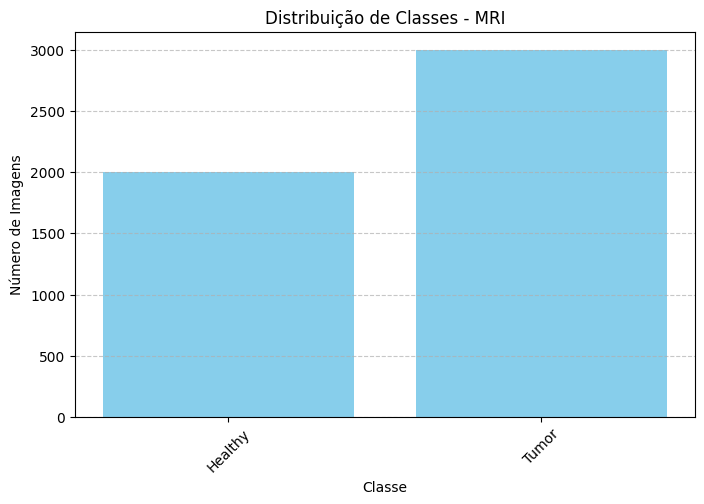

In [ ]:

# Criando uma lista com os índices de classe de cada imagem no dataset
# Exemplo: [0, 0, 1, 2, 1, ...] representando os rótulos numéricos
labels = [sample[1] for sample in MRI.samples]

# Contando quantas imagens existem por classe (baseado no índice da classe)
class_counts = Counter(labels)

# Pegando os nomes reais das classes a partir do atributo 'classes' do ImageFolder
class_names = MRI.classes

# Criando um dicionário mapeando o nome da classe para a quantidade de imagens
# Exemplo: {'Glioma': 1200, 'Meningioma': 1500, ...}
class_counts_named = {class_names[idx]: count for idx, count in class_counts.items()}

# Criando o gráfico de barras para visualizar a distribuição das classes
plt.figure(figsize=(8,5))
plt.bar(class_counts_named.keys(), class_counts_named.values(), color='skyblue')

# Configurando os títulos e rótulos do gráfico
plt.title('Distribuição de Classes - MRI')
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


Nesta etapa do EDA, estamos visualizando amostras aleatórias do dataset de MRI, com suas respectivas classes (tipos de tumor).

O objetivo é ter uma visão rápida da qualidade visual das imagens, verificar variações entre as classes e identificar possíveis ruídos ou inconsistências nos dados.

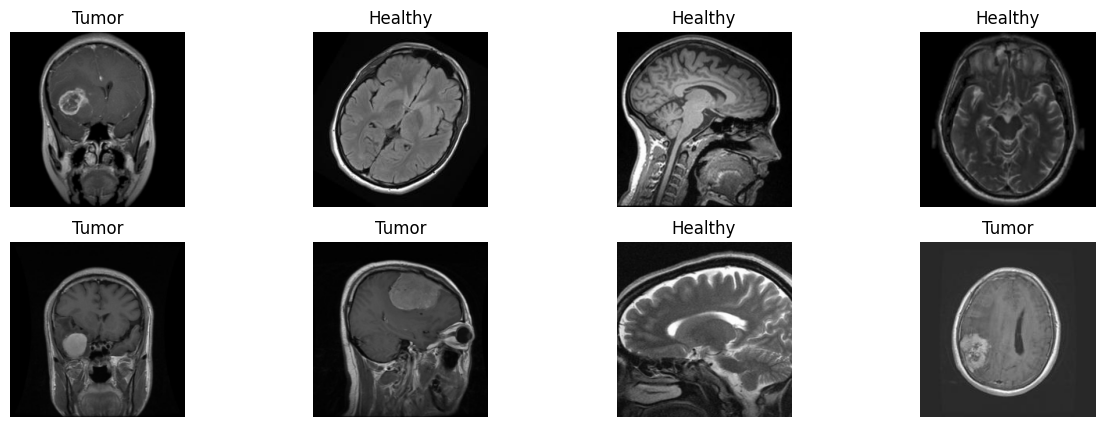

In [ ]:

# Função para exibir imagens aleatórias do dataset
def show_random_images(dataset, class_names, num_images=8):
    plt.figure(figsize=(15, 5))  # Define o tamanho da figura (largura x altura)

    # Seleciona índices aleatórios, sem repetição, dentro do tamanho do dataset
    indices = np.random.choice(len(dataset), num_images, replace=False)

    # Loop para plotar cada imagem selecionada
    for i, idx in enumerate(indices):
        # Obtendo a imagem e o label correspondente
        image, label = dataset[idx]

        # Convertendo o tensor de formato [C, H, W] para [H, W, C] (necessário para o matplotlib)
        image = image.permute(1, 2, 0)

        # Criando os subplots (ex.: 2 linhas por (num_images/2) colunas)
        plt.subplot(2, num_images//2, i+1)

        # Exibindo a imagem
        plt.imshow(image, cmap='gray')  # Para MRI, geralmente faz sentido mostrar como imagem em tons de cinza

        # Colocando o nome da classe como título da imagem
        plt.title(class_names[label])

        # Removendo os eixos para visualização mais limpa
        plt.axis('off')

# Chamando a função para mostrar 8 imagens aleatórias do MRI dataset
show_random_images(MRI, MRI.classes, num_images=8)


Nesta etapa, estamos analisando o tamanho original das imagens (antes do resize aplicado nas transformações do DataLoader).

O objetivo é entender se existe grande variação de resolução entre as imagens de diferentes classes, o que pode influenciar na escolha de técnicas de pré-processamento (como resize, padding ou cropping)

In [ ]:

# Loop sobre cada classe disponível no dataset MRI
for class_folder in MRI.classes:
    # Monta o caminho completo da pasta
    class_path = os.path.join(path, 'Dataset/Brain Tumor MRI images', class_folder)

    # Pega o nome do primeiro arquivo de imagem dentro da pasta da classe
    example_image_path = os.listdir(class_path)[0]

    # Abre a imagem usando PIL
    img = Image.open(os.path.join(class_path, example_image_path))

    # Exibe o nome da classe e o tamanho original da imagem (largura x altura)
    print(f"Classe: {class_folder}, Tamanho original: {img.size}")


Classe: Healthy, Tamanho original: (256, 256)
Classe: Tumor, Tamanho original: (224, 224)


Nesta etapa, estamos calculando as estatísticas básicas dos pixels das imagens de treino (MRI), após o transform (resize + ToTensor).

O foco é obter a média (mean) e o desvio padrão (std) por canal, que são informações fundamentais caso você queira aplicar normalização (Normalization) nos próximos passos do pipeline de deep learning.

Esse tipo de normalização ajuda o modelo a convergir mais rápido e evita problemas de escala entre as entradas.

In [ ]:


# Função para calcular a média e o desvio padrão dos pixels de todo o dataset
def get_dataset_stats(dataset):
    # Carregando o dataset em batches de 32 imagens
    loader = DataLoader(dataset, batch_size=32, shuffle=False)

    # Acumulador para a média
    mean = 0.0
    # Acumulador para o desvio padrão
    std = 0.0
    # Contador de imagens processadas
    total_images = 0

    # Loop sobre o DataLoader
    for images, _ in loader:
        # Número de imagens no batch atual
        batch_samples = images.size(0)

        # Reestruturando o tensor para formato: [batch, channels, pixels]
        images = images.view(batch_samples, images.size(1), -1)

        # Somando a média dos pixels de cada canal
        mean += images.mean(2).sum(0)

        # Somando o desvio padrão dos pixels de cada canal
        std += images.std(2).sum(0)

        # Atualizando o total de imagens processadas
        total_images += batch_samples

    # Calculando a média final por canal
    mean /= total_images

    # Calculando o desvio padrão final por canal
    std /= total_images

    return mean, std

# Calculando as estatísticas no dataset de treino (MRI)
mean, std = get_dataset_stats(MRI_train_dataset)

# Exibindo o resultado
print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.1907, 0.1906, 0.1906])
Std: tensor([0.1827, 0.1827, 0.1827])


Nesta etapa, estamos criando uma visualização que mostra múltiplas imagens para cada classe (tipo de tumor) do dataset MRI.

O objetivo é ter uma visão comparativa de como as imagens de diferentes classes se apresentam, identificando padrões visuais, diferenças entre classes e potenciais problemas de consistência no dataset.

Aqui, o código gera um grid organizado por classe, com um número configurável de amostras por classe

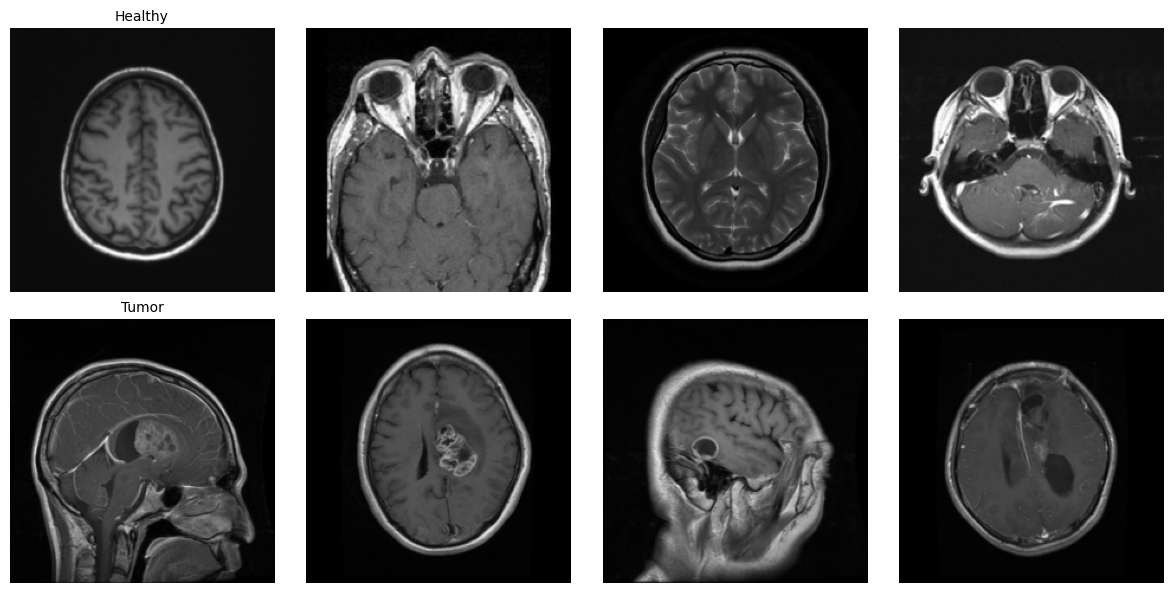

In [ ]:
# Função para mostrar múltiplas imagens de cada classe
def show_images_per_class(dataset, class_names, samples_per_class=4):
    # Cria uma grade (grid) de subplots com tamanho proporcional ao número de classes e imagens por classe
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class*3, len(class_names)*3))

    # Loop sobre cada classe (exemplo: Glioma, Meningioma, etc.)
    for class_idx, class_name in enumerate(class_names):
        images_shown = 0  # Contador de imagens mostradas para a classe atual

        # Loop sobre todo o dataset procurando imagens daquela classe
        for image, label in dataset:
            if label == class_idx:
                # Seleciona o subplot correspondente
                ax = axes[class_idx, images_shown]

                # Exibe a imagem (convertendo o tensor para formato correto para o matplotlib)
                ax.imshow(image.permute(1, 2, 0), cmap='gray')
                ax.axis('off' )  # Remove os eixos para melhor visualização

                # Adiciona o nome da classe apenas na primeira imagem da linha
                if images_shown == 0:
                    ax.set_title(f'{class_name}', fontsize=10)

                images_shown += 1

                # Limita o número de imagens por classe (exemplo: 4)
                if images_shown == samples_per_class:
                    break

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()

    # Exibe o grid
    plt.show()

# Chamando a função para mostrar 4 imagens de cada classe
show_images_per_class(MRI, MRI.classes, samples_per_class=4)


---

Agora, iremos criar um dataset com as imagens de ressonância magnética (MRI) e CL

In [ ]:
# Caminhos para as pastas contendo as imagens de tomografia (CT) e ressonância magnética (MRI)
PASTA_CT = '/Dataset/Brain Tumor CT scan Images'
PASTA_MRI = '/Dataset/Brain Tumor MRI images'

# Junta os caminhos com o diretório base (path) para obter os caminhos absolutos
ct_dataset_root = os.path.join(path, 'Dataset', PASTA_CT)
mri_dataset_root = os.path.join(path, 'Dataset', PASTA_MRI)


# Definição de um Dataset customizado para dados multi-modais
class MultiModalDataset(Dataset):
    def __init__(self, ct_root, mri_root, transform=None):
        self.ct_root = ct_root
        self.mri_root = mri_root
        self.transform = transform
        self.samples = []  # Lista que armazenará os pares (CT, MRI, label)

        # Coleta os nomes das classes (subpastas) e ordena
        self.classes = sorted([d for d in os.listdir(self.ct_root) if os.path.isdir(os.path.join(self.ct_root, d))])

        # Mapeia os nomes das classes para índices numéricos
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        # Percorre cada classe para parear imagens CT e MRI
        for class_name in self.classes:
            ct_class_dir = os.path.join(self.ct_root, class_name)
            mri_class_dir = os.path.join(self.mri_root, class_name)

            # Se não existir a pasta da classe correspondente em MRI, ignora
            if not os.path.isdir(mri_class_dir): continue

            # Para cada imagem CT, pareia com a primeira imagem MRI disponível da mesma classe
            for img_name in os.listdir(ct_class_dir):
                ct_path = os.path.join(ct_class_dir, img_name)
                try:
                    mri_img_name = os.listdir(mri_class_dir)[0]  # Assume apenas uma imagem MRI por classe
                    mri_path = os.path.join(mri_class_dir, mri_img_name)

                    # Se o caminho da imagem MRI for válido, adiciona o par ao dataset
                    if os.path.exists(mri_path):
                        self.samples.append((ct_path, mri_path, self.class_to_idx[class_name]))
                except IndexError:
                    # Caso a pasta da classe em MRI esteja vazia
                    continue

    def __len__(self):
        # Retorna o número total de pares válidos (CT, MRI)
        return len(self.samples)

    def __getitem__(self, idx):
        # Carrega os caminhos e o rótulo do par na posição `idx`
        ct_path, mri_path, label = self.samples[idx]

        # Abre as imagens e converte para RGB
        ct_image = Image.open(ct_path).convert("RGB")
        mri_image = Image.open(mri_path).convert("RGB")

        # Aplica as transformações (ex: redimensionamento, tensor)
        if self.transform:
            ct_image = self.transform(ct_image)
            mri_image = self.transform(mri_image)

        # Retorna um dicionário com as imagens e o rótulo
        return {'ct': ct_image, 'mri': mri_image, 'label': torch.tensor(label, dtype=torch.long)}


# Pré-processamento das imagens
# Redimensiona as imagens para 224x224 e converte para tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Instancia o dataset multi-modal com as transformações definidas
multi_modal_dataset = MultiModalDataset(ct_root=ct_dataset_root, mri_root=mri_dataset_root, transform=transform)

# Divisão do dataset em treino (80%) e teste (20%)
train_size = int(0.8 * len(multi_modal_dataset))
test_size = len(multi_modal_dataset) - train_size
multi_modal_train_dataset, multi_modal_test_dataset = random_split(multi_modal_dataset, [train_size, test_size])

# Criação dos DataLoaders
multi_modal_train_loader = DataLoader(
    multi_modal_train_dataset, batch_size=8, shuffle=True, num_workers=2, pin_memory=True
)
multi_modal_test_loader = DataLoader(
    multi_modal_test_dataset, batch_size=8, shuffle=False, num_workers=2, pin_memory=True
)

# Número total de classes presentes no dataset
NUM_CLASSES = len(multi_modal_dataset.classes)

# Define se o código será executado na GPU (se disponível) ou CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Mensagens de sucesso com informações básicas sobre o dataset carregado
print(f"\nSUCESSO! Dataset multi-modal carregado com {len(multi_modal_dataset)} amostras pareadas.")
print(f"Classes encontradas: {multi_modal_dataset.classes}")


SUCESSO! Dataset multi-modal carregado com 4618 amostras pareadas.
Classes encontradas: ['Healthy', 'Tumor']


# Modelos

Após a criação do dataset que iremos utilizar, nesta seção foram criados todos os modelos que utilizaremos ao decorrer deste projeto

In [ ]:
# Modelo Multi-tarefa com ResNet34 como encoder
class ResNetModel(nn.Module):
    def __init__(self, num_classes_multi=4):
        super(ResNetModel, self).__init__()

        #  ENCODER (Extração de características via ResNet34 pré-treinada)
        # Carrega a ResNet34 com pesos pré-treinados no ImageNet
        self.encoder_resnet = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)

        # Remove as duas últimas camadas: average pooling e fully connected
        # Isso permite usar a saída espacial da rede como um mapa de características (feature map)
        self.encoder_resnet = nn.Sequential(*(list(self.encoder_resnet.children())[:-2]))

        # A saída final da ResNet34 tem 512 canais (feature maps)
        encoder_output_channels = 512

        # DECODER para Segmentação (estilo U-Net)
        # Primeiro bloco de upsampling: aumenta a resolução e refina as features
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(encoder_output_channels, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
        )

        # Segundo bloco de upsampling
        self.upsample2 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(),
        )

        # Terceiro bloco de upsampling
        self.upsample3 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
        )

        # Camada final que gera o mapa de segmentação (1 canal = binário)
        self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)

        # CABEÇALHO PARA CLASSIFICAÇÃO BINÁRIA
        # Classifica se a imagem contém ou não tumor, por exemplo
        self.binary_classifier = nn.Sequential(
            nn.Linear(encoder_output_channels, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        # CABEÇALHO PARA CLASSIFICAÇÃO MULTICLASSE
        # Classifica o tipo de tumor (ex: Glioma, Meningioma, etc.)
        self.multi_class_classifier = nn.Sequential(
            nn.Linear(encoder_output_channels, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes_multi)
        )

    def forward(self, image_mri):
        # ENCODER
        # Extrai características da imagem de ressonância magnética
        features_mri = self.encoder_resnet(image_mri)  # [batch, 512, H', W']

        # DECODER PARA SEGMENTAÇÃO
        x_seg = self.upsample1(features_mri)
        x_seg = self.upsample2(x_seg)
        x_seg = self.upsample3(x_seg)

        # Ajusta a saída para a dimensão da imagem original (224x224)
        x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
        output_seg = self.final_seg_conv(x_seg)

        # CABEÇALHOS DE CLASSIFICAÇÃO
        # Aplica pooling global para reduzir o mapa [B, 512, H, W] para [B, 512]
        pooled_features = F.adaptive_avg_pool2d(features_mri, (1, 1)).view(features_mri.size(0), -1)

        # Classificação binária (1 output por imagem)
        output_binary = self.binary_classifier(pooled_features)

        # Classificação multiclasse (ex: 4 classes)
        output_multi = self.multi_class_classifier(pooled_features)

        # Retorna todos os resultados como dicionário
        return {
            "segmentation_mask": output_seg,
            "binary_classification": output_binary,
            "multi_class_classification": output_multi
        }

In [ ]:
# Modelo Multi-tarefa com EfficientNet-B0 como encoder
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes_multi=4):
        super(EfficientNetModel, self).__init__()

        # ENCODER (Extração de características via EfficientNet-B0 pré-treinada)
        # Carrega o modelo EfficientNet-B0 com pesos pré-treinados no ImageNet
        base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Utiliza apenas o extrator de features (sem as camadas de classificação do EfficientNet)
        self.encoder = base_model.features

        # A saída final da EfficientNet-B0 tem 1280 canais
        encoder_output_channels = 1280

        # DECODER para Segmentação (estilo U-Net)
        # Primeiro bloco de upsampling: aumenta a resolução e refina as features
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(encoder_output_channels, 512, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU()
        )

        # Segundo bloco de upsampling
        self.upsample2 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU()
        )

        # Terceiro bloco de upsampling
        self.upsample3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU()
        )

        # Quarto bloco de upsampling
        self.upsample4 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU()
        )

        # Camada final que gera o mapa de segmentação (1 canal = binário)
        self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)

        # CABEÇALHO PARA CLASSIFICAÇÃO BINÁRIA
        # Classifica se a imagem contém ou não tumor, por exemplo
        self.binary_classifier = nn.Sequential(
            nn.Linear(encoder_output_channels, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1)
        )

        # CABEÇALHO PARA CLASSIFICAÇÃO MULTICLASSE
        # Classifica o tipo de tumor (ex: Glioma, Meningioma, etc.)
        self.multi_class_classifier = nn.Sequential(
            nn.Linear(encoder_output_channels, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes_multi)
        )

    def forward(self, image):
        # ENCODER
        # Extrai características da imagem de ressonância magnética
        features = self.encoder(image)  # [batch, 1280, 7, 7]

        # DECODER PARA SEGMENTAÇÃO
        x_seg = self.upsample1(features)
        x_seg = self.upsample2(x_seg)
        x_seg = self.upsample3(x_seg)
        x_seg = self.upsample4(x_seg)

        # Ajusta a saída para a dimensão da imagem original (224x224)
        x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
        output_seg = self.final_seg_conv(x_seg)

        # CABEÇALHOS DE CLASSIFICAÇÃO
        # Aplica pooling global para reduzir o mapa [B, 1280, 7, 7] para [B, 1280]
        pooled_features = F.adaptive_avg_pool2d(features, (1, 1)).view(features.size(0), -1)

        # Classificação binária (1 output por imagem)
        output_binary = self.binary_classifier(pooled_features)

        # Classificação multiclasse (ex: 4 classes)
        output_multi = self.multi_class_classifier(pooled_features)

        # Retorna todos os resultados como dicionário
        return {
            "segmentation_mask": output_seg,
            "binary_classification": output_binary,
            "multi_class_classification": output_multi
        }


In [ ]:
# Modelo Multimodal com dois encoders (CT e MRI) e três saídas: segmentação, classificação binária e multiclasse
class UnifiedModel(nn.Module):
    def __init__(self, num_classes_multi=4):
        super(UnifiedModel, self).__init__()

        # 1. ENCODERS PARA CADA MODALIDADE DE IMAGEM
        # ENCODER para imagens de tomografia (CT) usando ResNet34 pré-treinada
        self.encoder_ct = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
        self.encoder_ct = nn.Sequential(*(list(self.encoder_ct.children())[:-2]))  # remove pooling e FC

        # ENCODER para imagens de ressonância magnética (MRI), também com ResNet34
        self.encoder_mri = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
        self.encoder_mri = nn.Sequential(*(list(self.encoder_mri.children())[:-2]))

        # As duas saídas (CT e MRI) são concatenadas: 512 canais de cada = 1024 canais no total
        fused_channels = 1024

        # 2. DECODER PARA SEGMENTAÇÃO (estilo U-Net adaptado para entrada com 1024 canais)
        # Primeiro bloco de upsampling
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(fused_channels, 512, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU()
        )

        # Segundo bloco de upsampling
        self.upsample2 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU()
        )

        # Terceiro bloco de upsampling
        self.upsample3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU()
        )

        # Quarto bloco de upsampling
        self.upsample4 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU()
        )

        # Camada final da segmentação (1 canal de saída = máscara binária)
        self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)

        # 3. CABEÇALHOS DE CLASSIFICAÇÃO

        # Classificação binária (ex: presença/ausência de tumor)
        self.binary_classifier = nn.Sequential(
            nn.Linear(fused_channels, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, 1)
        )

        # Classificação multiclasse (ex: tipo de tumor entre N classes)
        self.multi_class_classifier = nn.Sequential(
            nn.Linear(fused_channels, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, num_classes_multi)
        )

    def forward(self, image_ct, image_mri):
        # ENCODERS
        # Extrai características separadamente das imagens de CT e MRI
        features_ct = self.encoder_ct(image_ct)         # [B, 512, H, W]
        features_mri = self.encoder_mri(image_mri)      # [B, 512, H, W]

        # Concatena as duas representações ao longo do eixo de canais
        fused_features = torch.cat((features_ct, features_mri), dim=1)  # [B, 1024, H, W]

        # DECODER PARA SEGMENTAÇÃO
        x_seg = self.upsample1(fused_features)
        x_seg = self.upsample2(x_seg)
        x_seg = self.upsample3(x_seg)
        x_seg = self.upsample4(x_seg)

        # Ajusta a saída final para a dimensão original da imagem (224x224)
        x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
        output_seg = self.final_seg_conv(x_seg)

        # CABEÇALHOS DE CLASSIFICAÇÃO
        # Aplica global average pooling: [B, 1024, H, W] → [B, 1024]
        pooled_features = F.adaptive_avg_pool2d(fused_features, (1, 1)).view(fused_features.size(0), -1)

        # Classificação binária
        output_binary = self.binary_classifier(pooled_features)

        # Classificação multiclasse
        output_multi = self.multi_class_classifier(pooled_features)

        # Retorna as saídas em formato de dicionário
        return {
            "segmentation_mask": output_seg,
            "binary_classification": output_binary,
            "multi_class_classification": output_multi
        }

# Mensagem de confirmação
print("Classe 'UnifiedModel' definida.")

Classe 'UnifiedModel' definida.


In [ ]:
# Modelo Multimodal baseado em Vision Transformer (ViT) para segmentação e classificação
class ViTUnifiedModel(nn.Module):
    def __init__(self, num_classes_multi=4):
        super(ViTUnifiedModel, self).__init__()

        # ENCODERS: dois modelos ViT pré-treinados, um para cada modalidade
        self.encoder_ct = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
        self.encoder_mri = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)

        # Dimensão do token [CLS] e dos patches (ViT-base → 768)
        vit_hidden_dim = 768

        # Dimensão após fusão: concatenação dos CLS tokens e dos patch tokens
        fused_classification_dim = vit_hidden_dim * 2  # para classificação
        fused_segmentation_dim = vit_hidden_dim * 2    # para segmentação

        # CABEÇALHOS DE CLASSIFICAÇÃO

        # Classificação binária (ex: presença ou ausência de patologia)
        self.binary_classifier = nn.Sequential(
            nn.Linear(fused_classification_dim, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, 1)
        )

        # Classificação multiclasse (ex: tipo de patologia)
        self.multi_class_classifier = nn.Sequential(
            nn.Linear(fused_classification_dim, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, num_classes_multi)
        )

        # DECODER PARA SEGMENTAÇÃO — idêntico ao modelo anterior (ResNet)
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(fused_segmentation_dim, 512, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample2 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample4 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU()
        )
        self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)  # saída binária de segmentação

    def forward(self, image_ct, image_mri):
        # Função auxiliar para processar uma imagem com ViT e extrair CLS e patches
        def prepare_and_encode(encoder_obj, image_input):
            # Pré-processa a imagem (normalização e flatten dos patches)
            x = encoder_obj._process_input(image_input)  # [B, 196, 768]
            n = x.shape[0]

            # Adiciona o token [CLS] no início da sequência
            batch_class_token = encoder_obj.class_token.expand(n, -1, -1)  # [B, 1, 768]
            x = torch.cat([batch_class_token, x], dim=1)  # [B, 197, 768]

            # Passa pelo encoder transformer
            x = encoder_obj.encoder(x)  # [B, 197, 768]

            # Separa o token [CLS] (posição 0) e os tokens de patches (1-196)
            cls_token = x[:, 0]          # [B, 768]
            patch_tokens = x[:, 1:]      # [B, 196, 768]
            return cls_token, patch_tokens

        # Extrai tokens para ambas as modalidades
        cls_token_ct, patch_tokens_ct = prepare_and_encode(self.encoder_ct, image_ct)
        cls_token_mri, patch_tokens_mri = prepare_and_encode(self.encoder_mri, image_mri)

        # CAMINHO DA CLASSIFICAÇÃO
        # Concatena os CLS tokens de CT e MRI → [B, 1536]
        fused_cls_tokens = torch.cat((cls_token_ct, cls_token_mri), dim=1)

        # Passa pelas camadas de classificação
        output_binary = self.binary_classifier(fused_cls_tokens)
        output_multi = self.multi_class_classifier(fused_cls_tokens)

        # CAMINHO DA SEGMENTAÇÃO
        # Concatena os patch tokens ao longo da dimensão dos canais → [B, 196, 1536]
        fused_patch_tokens = torch.cat((patch_tokens_ct, patch_tokens_mri), dim=2)

        # Rearranja os tokens para formar um mapa de características 2D
        batch_size, num_patches, channels = fused_patch_tokens.shape
        grid_size = int(num_patches ** 0.5)  # deve ser 14x14 (se 196 tokens)
        feature_map = fused_patch_tokens.permute(0, 2, 1).view(batch_size, channels, grid_size, grid_size)

        # Decoder convolucional com upsampling até 224x224
        x_seg = self.upsample1(feature_map)
        x_seg = self.upsample2(x_seg)
        x_seg = self.upsample3(x_seg)
        x_seg = self.upsample4(x_seg)
        x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
        output_seg = self.final_seg_conv(x_seg)

        # Saídas do modelo
        return {
            "segmentation_mask": output_seg,
            "binary_classification": output_binary,
            "multi_class_classification": output_multi
        }


In [ ]:
!pip install -q -U transformers peft bitsandbytes accelerate

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType
from transformers import BitsAndBytesConfig, ViTForImageClassification

# Arquitetura multimodal baseada em Vision Transformer com quantização 4-bit (QLoRA)
class ViTUnifiedModel_QLoRA(nn.Module):
    def __init__(self, num_classes_multi=4):
        super(ViTUnifiedModel_QLoRA, self).__init__()

        # CONFIGURAÇÃO DE QUANTIZAÇÃO (bnb = bitsandbytes)
        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,                          # ativa quantização 4-bit
            bnb_4bit_quant_type="nf4",                  # usa NormalFloat4 para melhor precisão
            bnb_4bit_compute_dtype=torch.float16,       # computação em float16
            bnb_4bit_use_double_quant=True              # ativa dupla quantização (melhora compressão)
        )

        # CONFIGURAÇÃO DO LoRA (Low-Rank Adaptation)
        lora_config = LoraConfig(
            r=8, lora_alpha=16,
            target_modules=["query", "value"],          # aplica LoRA apenas nas camadas Q e V
            lora_dropout=0.05,
            bias="none"
        )

        # Nome do modelo pré-treinado ViT da HuggingFace
        model_name = "google/vit-base-patch16-224-in21k"

        print("Carregando encoders ViT (ViTForImageClassification) quantizados...")

        # Dois encoders ViT quantizados com LoRA: um para CT, outro para MRI
        self.encoder_ct = get_peft_model(
            ViTForImageClassification.from_pretrained(model_name, quantization_config=quantization_config),
            lora_config
        )
        self.encoder_mri = get_peft_model(
            ViTForImageClassification.from_pretrained(model_name, quantization_config=quantization_config),
            lora_config
        )

        # Exibe o número de parâmetros treináveis (útil para debug)
        self.encoder_ct.print_trainable_parameters()

        # Dimensão dos embeddings do ViT-base (cls e patches)
        vit_hidden_dim = 768

        # Dimensões após fusão (concatenação CT + MRI)
        fused_classification_dim, fused_segmentation_dim = vit_hidden_dim * 2, vit_hidden_dim * 2

        # CABEÇALHO DE CLASSIFICAÇÃO BINÁRIA
        self.binary_classifier = nn.Sequential(
            nn.Linear(fused_classification_dim, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, 1)
        )

        # CABEÇALHO DE CLASSIFICAÇÃO MULTICLASSE
        self.multi_class_classifier = nn.Sequential(
            nn.Linear(fused_classification_dim, 512), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(512, num_classes_multi)
        )

        # DECODER DE SEGMENTAÇÃO (upsampling progressivo)
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(fused_segmentation_dim, 512, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample2 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU()
        )
        self.upsample4 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU()
        )
        self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)  # saída com 1 canal (máscara binária)

    def forward(self, pixel_values_ct, pixel_values_mri):
        # Passa as imagens por cada encoder ViT
        output_ct = self.encoder_ct(pixel_values=pixel_values_ct, output_hidden_states=True)
        output_mri = self.encoder_mri(pixel_values=pixel_values_mri, output_hidden_states=True)

        # Pega os hidden_states da última camada Transformer
        hidden_states_ct = output_ct.hidden_states[-1]     # [B, 197, 768]
        hidden_states_mri = output_mri.hidden_states[-1]   # [B, 197, 768]

        # Separa token CLS (posição 0) e tokens de patches (1–196)
        cls_token_ct, cls_token_mri = hidden_states_ct[:, 0], hidden_states_mri[:, 0]
        patch_tokens_ct, patch_tokens_mri = hidden_states_ct[:, 1:], hidden_states_mri[:, 1:]

        # CAMINHO DA CLASSIFICAÇÃO
        fused_cls_tokens = torch.cat((cls_token_ct, cls_token_mri), dim=1)  # [B, 1536]
        fused_cls_tokens = fused_cls_tokens.float()  # evita erro com float16 em camadas lineares

        output_binary = self.binary_classifier(fused_cls_tokens)
        output_multi = self.multi_class_classifier(fused_cls_tokens)

        # CAMINHO DA SEGMENTAÇÃO
        fused_patch_tokens = torch.cat((patch_tokens_ct, patch_tokens_mri), dim=2)  # [B, 196, 1536]
        batch_size, num_patches, channels = fused_patch_tokens.shape
        grid_size = int(num_patches ** 0.5)  # deve ser 14x14 = 196

        # Rearranja para [B, C, H, W] = [B, 1536, 14, 14]
        feature_map = fused_patch_tokens.permute(0, 2, 1).view(batch_size, channels, grid_size, grid_size)
        feature_map = feature_map.float()  # evita erro com float16

        # Upsampling progressivo até 224x224
        x_seg = self.upsample1(feature_map)
        x_seg = self.upsample2(x_seg)
        x_seg = self.upsample3(x_seg)
        x_seg = self.upsample4(x_seg)

        # Interpolação final para tamanho fixo da saída (caso necessário)
        x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
        output_seg = self.final_seg_conv(x_seg)

        # Retorna as saídas em dicionário
        return {
            "segmentation_mask": output_seg,
            "binary_classification": output_binary,
            "multi_class_classification": output_multi
        }

# Log de confirmação
print("Classe 'ViTUnifiedModel_QLoRA' definida com sucesso (com correção de dtype).")

Classe 'ViTUnifiedModel_QLoRA' definida com sucesso (com correção de dtype).


In [ ]:
# tqdm: barra de progresso para acompanhar o treinamento
from tqdm import tqdm

# Função genérica de treinamento + validação de modelo multimodal
def run_multi_modal_experiment(
    model,
    model_name,
    train_loader,
    test_loader,
    device,
    num_epochs=10,
    lr=1e-4,
    log_each_epoch=True
):
    # Otimizador AdamW (recomendado para Transformers)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    # Função de perda para classificação multiclasse
    criterion = torch.nn.CrossEntropyLoss()

    # Move o modelo para GPU (ou CPU, dependendo do `device`)
    model = model.to(device)

    # Histórico para salvar a loss de treino e acurácia de validação
    history = {'train_loss': [], 'val_acc': []}

    # Loop de épocas
    for epoch in range(num_epochs):
        model.train()  # Coloca o modelo em modo de treino
        running_loss = 0.0

        # Loop de batches com barra de progresso (tqdm)
        for xb, yb in tqdm(train_loader, desc=f'Train {model_name} (epoch {epoch+1})', leave=False):
            xb, yb = xb.to(device), yb.to(device)   # move inputs e targets para o device
            optimizer.zero_grad()                  # zera os gradientes acumulados
            out = model(xb)                         # forward pass
            loss = criterion(out, yb)               # calcula a loss
            loss.backward()                         # backpropagation
            optimizer.step()                        # atualiza os pesos

            # Acumula loss do batch
            running_loss += loss.item() * xb.size(0)

        # Calcula a loss média da época
        avg_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(avg_train_loss)

        # Validação (sem cálculo de gradiente)
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                _, preds = torch.max(outputs, 1)     # pega a classe de maior probabilidade
                correct += (preds == yb).sum().item()
                total += yb.size(0)

        # Calcula acurácia da validação
        val_acc = correct / total if total > 0 else 0
        history['val_acc'].append(val_acc)

        # Log a cada época (se ativado)
        if log_each_epoch:
            print(f"Epoch {epoch+1}/{num_epochs}: Train Loss={avg_train_loss:.4f}, Val Acc={val_acc:.4f}")

    print(f"Treinamento concluído para {model_name}!")
    return history  # retorna histórico de loss e acurácia


IndentationError: expected an indented block after 'for' statement on line 2 (ipython-input-54-682399097.py, line 3)

In [ ]:
qlora_vit_model = ViTUnifiedModel_QLoRA(num_classes_multi=NUM_CLASSES).to(device)

# Executa o treinamento usando a função genérica já definida anteriormente

history_qlora_vit = run_multi_modal_experiment(
    model=qlora_vit_model,
    model_name="ViTUnifiedModel (QLoRA)",               # nome que será exibido no tqdm e nos logs
    train_loader=multi_modal_train_loader,              # DataLoader de treino multimodal
    test_loader=multi_modal_test_loader,                # DataLoader de validação multimodal
    device=device                                        # GPU ou CPU
)

# Mensagem final indicando que tudo terminou com sucesso
print("\nTreinamento do modelo ViT com QLoRA concluído!")

Carregando encoders ViT (ViTForImageClassification) quantizados...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 294,912 || all params: 86,095,106 || trainable%: 0.3425


ValueError: too many values to unpack (expected 2)

# Treinamento

In [ ]:

# FUNÇÃO DE PLOTAGEM EM TEMPO REAL
def live_plot(history, epoch, num_epochs, model_name):
  """
  Função para limpar a saída e desenhar o gráfico de perda e acurácia.
  """
  # Limpa a saída da célula atual
  clear_output(wait=True)

  # Prepara os dados do eixo X (épocas)
  epochs_so_far = range(1, len(history['train_loss']) + 1)

  # Cria a figura e os eixos
  plt.style.use('seaborn-v0_8-whitegrid')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
  fig.suptitle(f'Treinando {model_name} - Época {epoch}/{num_epochs}', fontsize=20, y=1.03)

  # --- Gráfico de Acurácia ---
  ax1.plot(epochs_so_far, history['train_acc'], 'bo-', label='Acurácia de Treino')
  ax1.plot(epochs_so_far, history['test_acc'], 'ro-', label='Acurácia de Validação')
  ax1.set_title('Acurácia por Época', fontsize=16)
  ax1.set_xlabel('Épocas', fontsize=12)
  ax1.set_ylabel('Acurácia', fontsize=12)
  ax1.legend()
  # Define os limites do eixo Y para acurácia para melhor visualização
  ax1.set_ylim(0, 1.05)
  # Garante ticks inteiros para épocas
  ax1.set_xticks(np.arange(1, num_epochs + 1, 1))

  # --- Gráfico de Perda (Loss) ---
  ax2.plot(epochs_so_far, history['train_loss'], 'bo-', label='Perda de Treino')
  ax2.plot(epochs_so_far, history['test_loss'], 'ro-', label='Perda de Validação')
  ax2.set_title('Perda (Loss) por Época', fontsize=16)
  ax2.set_xlabel('Épocas', fontsize=12)
  ax2.set_ylabel('Perda', fontsize=12)
  ax2.legend()
  # Garante ticks inteiros para épocas
  ax2.set_xticks(np.arange(1, num_epochs + 1, 1))

  # Mostra o gráfico
  plt.show()


In [ ]:
# FUNÇÃO DE EXPERIMENTO
def run_experiment_with_live_plot(model, model_name, train_loader, test_loader, device):
  print(f"--- Iniciando experimento para: {model_name} ---")

  model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-4)
  num_epochs = 3

  history = {
      "train_loss": [], "train_acc": [],
      "test_loss": [], "test_acc": []
  }

  start_time = time.time()

  for epoch in range(1, num_epochs + 1):
      # --- Treinamento ---
      model.train()
      train_loss, train_correct = 0, 0
      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()

          outputs = model(images)

          # --- LIDAR COM MODELOS MULTI-TAREFA ---
          if isinstance(outputs, dict):
              # Se a saída for um dicionário, pegue os logits da classificação multiclasse
              logits = outputs["multi_class_classification"]
          else:
              # Senão, a saída já é o tensor de logits (para modelos mais simples)
              logits = outputs

          loss = criterion(logits, labels)
          loss.backward()
          optimizer.step()

          train_loss += loss.item() * images.size(0)
          # Usar logits aqui também
          _, preds = torch.max(logits, 1)
          train_correct += torch.sum(preds == labels.data)

      # --- Avaliação ---
      model.eval()
      test_loss, test_correct = 0, 0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)

              outputs = model(images)

              if isinstance(outputs, dict):
                  logits = outputs["multi_class_classification"]
              else:
                  logits = outputs

              loss = criterion(logits, labels)
              test_loss += loss.item() * images.size(0)
              # Usar logits aqui também
              _, preds = torch.max(logits, 1)
              test_correct += torch.sum(preds == labels.data)

      # Calcular e salvar médias
      avg_train_loss = train_loss / len(train_loader.dataset)
      avg_train_acc = train_correct.double() / len(train_loader.dataset)
      avg_test_loss = test_loss / len(test_loader.dataset)
      avg_test_acc = test_correct.double() / len(test_loader.dataset)
      history["train_loss"].append(avg_train_loss)
      history["train_acc"].append(avg_train_acc.item())
      history["test_loss"].append(avg_test_loss)
      history["test_acc"].append(avg_test_acc.item())

      # ATUALIZAR GRÁFICO
      live_plot(history, epoch, num_epochs, model_name)

      # Imprimir o status
      print(f"Epoch {epoch}/{num_epochs} | Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.4f} | Val Loss: {avg_test_loss:.4f}, Val Acc: {avg_test_acc:.4f}")

  end_time = time.time()
  total_time = end_time - start_time
  print(f"\nTempo total de treinamento para {model_name}: {total_time:.2f} segundos")

  return history

In [ ]:
# Treinamento para o Modelo Multi-Modal

# --- FUNÇÃO DE EXPERIMENTO ADAPTADA PARA MULTI-MODAL ---
def run_multi_modal_experiment(model, model_name, train_loader, test_loader, device):
    print(f"--- Iniciando experimento para: {model_name} ---")

    # As variáveis NUM_CLASSES e device devem ter sido definidas na célula anterior
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    num_epochs = 10 # Aumentamos para 15 para um treinamento mais significativo

    history = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    start_time = time.time()

    for epoch in range(1, num_epochs + 1):
        # --- Treinamento ---
        model.train()
        train_loss, train_correct = 0, 0
        for batch in train_loader:
            # ADAPTAÇÃO: Desempacotar o dicionário de dados multi-modais
            image_ct = batch['ct'].to(device)
            image_mri = batch['mri'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()

            # ADAPTAÇÃO: Chamada do modelo com as duas imagens
            outputs = model(image_ct, image_mri)

            # Acessa os logits da classificação para calcular a perda e acurácia
            logits = outputs["multi_class_classification"]
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * image_ct.size(0)
            _, preds = torch.max(logits, 1)
            train_correct += torch.sum(preds == labels.data)

        # --- Avaliação ---
        model.eval()
        test_loss, test_correct = 0, 0
        with torch.no_grad():
            for batch in test_loader:
                image_ct = batch['ct'].to(device)
                image_mri = batch['mri'].to(device)
                labels = batch['label'].to(device)

                outputs = model(image_ct, image_mri)
                logits = outputs["multi_class_classification"]
                loss = criterion(logits, labels)
                test_loss += loss.item() * image_ct.size(0)
                _, preds = torch.max(logits, 1)
                test_correct += torch.sum(preds == labels.data)

        # Calcular e salvar médias
        avg_train_loss = train_loss / len(train_loader.dataset)
        avg_train_acc = train_correct.double() / len(train_loader.dataset)
        avg_test_loss = test_loss / len(test_loader.dataset)
        avg_test_acc = test_correct.double() / len(test_loader.dataset)
        history["train_loss"].append(avg_train_loss)
        history["train_acc"].append(avg_train_acc.item())
        history["test_loss"].append(avg_test_loss)
        history["test_acc"].append(avg_test_acc.item())

        # ATUALIZAR GRÁFICO
        live_plot(history, epoch, num_epochs, model_name)
        print(f"Epoch {epoch}/{num_epochs} | Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.4f} | Val Loss: {avg_test_loss:.4f}, Val Acc: {avg_test_acc:.4f}")

    end_time = time.time()
    print(f"\nTempo total de treinamento para {model_name}: {total_time:.2f} segundos")
    return history

In [ ]:
resnet_model = ResNetModel(num_classes_multi=NUM_CLASSES).to(device)
history_resnet = run_experiment_with_live_plot(resnet_model, "ResNetModel", MRI_train_loader, MRI_test_loader, device)

In [ ]:
efficientnet_model = EfficientNetModel(num_classes_multi=NUM_CLASSES).to(device)
history_efficientnet = run_experiment_with_live_plot(efficientnet_model, "EfficientNetModel", MRI_train_loader, MRI_test_loader, device)

In [ ]:
unified_model = UnifiedModel(num_classes_multi=NUM_CLASSES).to(device)
history_unified = run_multi_modal_experiment(unified_model, "UnifiedModel (CT+MRI)", multi_modal_train_loader, multi_modal_test_loader, device)

print("\nTreinamento do modelo multi-modal concluído!")

In [ ]:
vit_model = ViTUnifiedModel(num_classes_multi=NUM_CLASSES).to(device)
history_vit = run_multi_modal_experiment(vit_model, "ViTUnifiedModel (CT+MRI)", multi_modal_train_loader, multi_modal_test_loader, device)

print("\nTreinamento do modelo ViT multi-modal concluído!")

# Avaliação

In [ ]:
# Função de avaliação para modelos multi-tarefa
def generate_evaluation_metrics(model, dataloader, device, class_names):
    # Coloca o modelo em modo de avaliação
    model.eval()
    y_true = []
    y_pred = []

    # Desabilita o cálculo de gradientes para acelerar
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # A saída do modelo agora é um dicionário
            output_dict = model(images)

            # Acessamos a saída específica da classificação multiclasse antes de usar torch.max
            # Esta é a chave que contém os logits para a nossa tarefa de interesse.
            multi_class_logits = output_dict["multi_class_classification"]
            _, predicted = torch.max(multi_class_logits, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())


    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Previsão do Modelo', fontsize=12)
    plt.ylabel('Rótulo Verdadeiro', fontsize=12)
    plt.title(f'Matriz de Confusão Final - {model.__class__.__name__}', fontsize=16)
    plt.show()

    # Relatório de Classificação
    print(f"\n--- Relatório de Classificação Final para {model.__class__.__name__} ---\n")
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

In [ ]:
print("Iniciando a avaliação final no conjunto de teste para o modelo ResNet...")
generate_evaluation_metrics(resnet_model, MRI_test_loader, device, MRI.classes)

In [ ]:
print("Iniciando a avaliação final no conjunto de teste para modelo EfficientNet...")
generate_evaluation_metrics(efficientnet_model, MRI_test_loader, device, MRI.classes)

In [ ]:
def visualize_predictions(model, dataloader, device, class_names, num_images=10):
    model.eval()
    # Pega um lote de imagens
    images, labels = next(iter(dataloader))
    images, labels = images.to(device), labels.to(device)

    # Pega as previsões
    # A saída é um dicionário
    output_dict = model(images)

    # Acessamos a saída correta do dicionário antes de aplicar torch.max
    multi_class_logits = output_dict["multi_class_classification"]
    _, preds = torch.max(multi_class_logits, 1)

    plt.figure(figsize=(15, 7))
    plt.suptitle("Inspeção Visual das Previsões", fontsize=20)

    for i in range(num_images):
        plt.subplot(2, 5, i + 1)

        # O tensor da imagem precisa ser movido para a CPU e reordenado para o formato do Matplotlib
        img = images[i].cpu().permute(1, 2, 0)

        # Define a cor do título: verde para acerto, vermelho para erro
        color = "green" if preds[i] == labels[i] else "red"

        plt.imshow(img)
        plt.title(f'Previsto: {class_names[preds[i]]}\nReal: {class_names[labels[i]]}', color=color)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [ ]:
visualize_predictions(resnet_model, MRI_test_loader, device, MRI.classes)
visualize_predictions(efficientnet_model, MRI_test_loader, device, MRI.classes)

In [ ]:
def predict_single_image(model, image_path, transform, device, class_names):
    model.eval()

    # Carregar a imagem
    try:
        # Garante 3 canais de cor
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado em '{image_path}'")
        # Retorna None para indicar falha
        return None, None

    # Aplicar as transformações
    image_tensor = transform(image)

    # Adicionar a dimensão de lote (batch dimension)
    image_tensor = image_tensor.unsqueeze(0)

    # Mover para o dispositivo
    image_tensor = image_tensor.to(device)

    with torch.no_grad():
        # Obter as previsões
        # A saída do modelo é um dicionário
        output_dict = model(image_tensor)

        # Acessamos o tensor de logits correto usando a chave de texto
        multi_class_logits = output_dict["multi_class_classification"]

        # Converter logits para probabilidades usando Softmax
        # Usamos multi_class_logits[0] para pegar o primeiro (e único) item do lote
        probabilities = torch.nn.functional.softmax(multi_class_logits[0], dim=0)

        # Obter a classe com maior probabilidade
        confidence, predicted_idx = torch.max(probabilities, 0)

        predicted_class = class_names[predicted_idx.item()]

    return predicted_class, confidence.item()


# Primeiro, vamos pegar um caminho de imagem de exemplo do nosso conjunto de teste
sample_image_path = MRI_test_dataset.dataset.samples[0][0]

# Chame a função de previsão
predicted_class, confidence = predict_single_image(resnet_model, sample_image_path, transform, device, MRI.classes)

# Mostra a imagem e o resultado
if predicted_class:
    img = Image.open(sample_image_path)
    plt.imshow(img)
    plt.title(f'Previsão: {predicted_class}\nConfiança: {confidence*100:.2f}%')
    plt.axis('off')
    plt.show()

    print(f"A imagem '{sample_image_path.split('/')[-1]}' foi classificada como: '{predicted_class}' com {confidence*100:.2f}% de confiança.")

In [ ]:
# --- FUNÇÃO DE AVALIAÇÃO ADAPTADA PARA O MODELO MULTI-MODAL ---
def generate_multi_modal_evaluation_metrics(model, dataloader, device, class_names):
    # Coloca o modelo em modo de avaliação
    model.eval()
    y_true = []
    y_pred = []

    # Desabilita o cálculo de gradientes para acelerar
    with torch.no_grad():
        # ADAPTAÇÃO 1: O lote (batch) agora é um dicionário
        for batch in dataloader:
            # Extrai as imagens de CT, MRI e os rótulos do dicionário
            image_ct = batch['ct'].to(device)
            image_mri = batch['mri'].to(device)
            labels = batch['label'].to(device)

            # ADAPTAÇÃO 2: Chamada do modelo com as duas imagens
            output_dict = model(image_ct, image_mri)

            # O resto da lógica é a mesma, pois o output_dict tem a mesma estrutura
            multi_class_logits = output_dict["multi_class_classification"]
            _, predicted = torch.max(multi_class_logits, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Previsão do Modelo', fontsize=12)
    plt.ylabel('Rótulo Verdadeiro', fontsize=12)
    plt.title(f'Matriz de Confusão Final - {model.__class__.__name__}', fontsize=16)
    plt.show()

    # Relatório de Classificação
    print(f"\n--- Relatório de Classificação Final para {model.__class__.__name__} ---\n")
    report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0)
    print(report)

In [ ]:
generate_multi_modal_evaluation_metrics(
    model=unified_model,
    dataloader=multi_modal_test_loader,
    device=device,
    class_names=multi_modal_dataset.classes
)

In [ ]:
# --- FUNÇÃO DE VISUALIZAÇÃO ADAPTADA PARA O MODELO MULTI-MODAL ---
def visualize_multi_modal_predictions(model, dataloader, device, class_names, num_pairs=5):
    # Coloca o modelo em modo de avaliação
    model.eval()

    # Pega um lote de dados do dataloader multi-modal
    batch = next(iter(dataloader))

    # Extrai as imagens e rótulos do dicionário e move para o dispositivo
    images_ct = batch['ct'].to(device)
    images_mri = batch['mri'].to(device)
    labels = batch['label'].to(device)

    # Pega as previsões do modelo
    with torch.no_grad():
        # ADAPTAÇÃO: Chamada do modelo com as duas imagens
        output_dict = model(images_ct, images_mri)

    # Acessa os logits da classificação multiclasse
    multi_class_logits = output_dict["multi_class_classification"]
    _, preds = torch.max(multi_class_logits, 1)

    # --- ADAPTAÇÃO: Plotagem em pares ---
    # Cria uma figura para mostrar os pares de imagens
    fig, axes = plt.subplots(num_pairs, 2, figsize=(10, num_pairs * 5))
    fig.suptitle("Inspeção Visual das Previsões Multi-Modais", fontsize=20, y=1.0)

    for i in range(num_pairs):
        # Define a cor do título: verde para acerto, vermelho para erro
        color = "green" if preds[i] == labels[i] else "red"
        prediction_text = f'Previsto: {class_names[preds[i]]}\nReal: {class_names[labels[i]]}'

        # --- Plot da Imagem CT ---
        ax_ct = axes[i, 0]
        img_ct = images_ct[i].cpu().permute(1, 2, 0)
        ax_ct.imshow(img_ct)
        ax_ct.set_title(f"Input CT\n{prediction_text}", color=color)
        ax_ct.axis('off')

        # --- Plot da Imagem MRI ---
        ax_mri = axes[i, 1]
        img_mri = images_mri[i].cpu().permute(1, 2, 0)
        ax_mri.imshow(img_mri)
        ax_mri.set_title(f"Input MRI\n{prediction_text}", color=color)
        ax_mri.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [ ]:
visualize_multi_modal_predictions(
    model=unified_model,
    dataloader=multi_modal_test_loader,
    device=device,
    class_names=multi_modal_dataset.classes,
    num_pairs=5 # Mostra 5 pares de imagens
)

In [ ]:
# --- FUNÇÃO DE PREVISÃO ADAPTADA PARA O MODELO MULTI-MODAL ---
def predict_multi_modal_image(model, ct_path, mri_path, transform, device, class_names):
    # Coloca o modelo em modo de avaliação
    model.eval()

    try:
        # 1. Carregar as DUAS imagens
        ct_image = Image.open(ct_path).convert("RGB")
        mri_image = Image.open(mri_path).convert("RGB")
    except FileNotFoundError as e:
        print(f"Erro: Arquivo não encontrado. Verifique os caminhos.")
        print(e)
        return None, None

    # 2. Aplicar as transformações a AMBAS as imagens
    ct_tensor = transform(ct_image)
    mri_tensor = transform(mri_image)

    # 3. Adicionar a dimensão de lote (batch dimension) a AMBOS os tensores
    ct_tensor = ct_tensor.unsqueeze(0)
    mri_tensor = mri_tensor.unsqueeze(0)

    # Mover ambos os tensores para o dispositivo
    ct_tensor = ct_tensor.to(device)
    mri_tensor = mri_tensor.to(device)

    with torch.no_grad():
        # 4. Obter as previsões usando as DUAS imagens como entrada
        output_dict = model(ct_tensor, mri_tensor)

        # O resto da lógica é o mesmo, pois o formato do dicionário de saída é consistente
        multi_class_logits = output_dict["multi_class_classification"]
        probabilities = torch.nn.functional.softmax(multi_class_logits[0], dim=0)
        confidence, predicted_idx = torch.max(probabilities, 0)
        predicted_class = class_names[predicted_idx.item()]

    return predicted_class, confidence.item()

In [ ]:
# Primeiro, vamos pegar um par de caminhos de imagem de exemplo do nosso dataset de teste
# A variável 'multi_modal_test_dataset' foi criada na célula de preparação de dados
sample_idx = 0
sample_ct_path, sample_mri_path, true_label_idx = multi_modal_test_dataset.dataset.samples[multi_modal_test_dataset.indices[sample_idx]]

predicted_class, confidence = predict_multi_modal_image(
    model=unified_model,
    ct_path=sample_ct_path,
    mri_path=sample_mri_path,
    transform=transform,
    device=device,
    class_names=multi_modal_dataset.classes
)

# Mostra as imagens de entrada e o resultado
if predicted_class:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    img_ct = Image.open(sample_ct_path)
    ax1.imshow(img_ct)
    ax1.set_title("Input CT")
    ax1.axis('off')

    img_mri = Image.open(sample_mri_path)
    ax2.imshow(img_mri)
    ax2.set_title("Input MRI")
    ax2.axis('off')

    plt.suptitle(f'Previsão: {predicted_class} ({confidence*100:.2f}%)', fontsize=16)
    plt.show()

    print(f"O par de imagens foi classificado como: '{predicted_class}' com {confidence*100:.2f}% de confiança.")
    print(f"O rótulo verdadeiro era: '{multi_modal_dataset.classes[true_label_idx]}'")